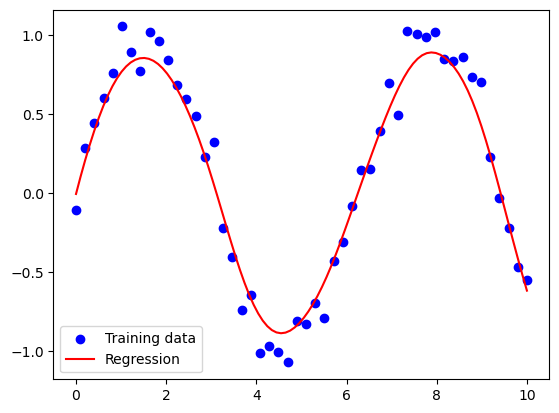

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def local_reg(x_query, X_train, y_train, tau = 0.1):
    wi = np.exp(-np.sum((X_train - x_query)**2, axis = 1)/(2*(tau**2)))
    W = np.diag(wi)
    theta = np.linalg.inv(X_train.T @ W @ X_train)@(X_train.T @ W @ y_train)
    return x_query @ theta

X_train = np.linspace(0,10,50)
y_train = np.sin(X_train) + np.random.normal(0,0.1,X_train.shape[0])

X_query = np.linspace(0,10,100)
tau = 0.5
predictions = []

for xq in X_query:
    x_query = np.array([1,xq])
    pred = local_reg(x_query, np.c_[np.ones(X_train.shape[0]),X_train], y_train, tau)
    predictions.append(pred)

plt.scatter(X_train, y_train, c='b', label = 'Training data')
plt.plot(X_query, predictions, c='r', label = 'Regression')
plt.legend()
plt.show()
    